# Import modules

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df = pd.read_csv('data.csv')
df.head()

,CustomerType,Gender,Age,UnitPrice,Rating,ItemName
0,1,1,1,25,9.1,BerryBlonde
1,0,1,1,25,9.6,BerryBlonde
2,0,0,1,25,7.4,BerryBlonde
3,1,0,1,25,8.4,BerryBlonde
4,0,0,1,25,5.3,BerryBlonde


In [4]:
# delete a column
# df = df.drop(columns = ['UnitPrice','Rating'])
# df = df.drop(columns = ['UnitPrice'])
df.head()

,CustomerType,Gender,Age,UnitPrice,Rating,ItemName
0,1,1,1,25,9.1,BerryBlonde
1,0,1,1,25,9.6,BerryBlonde
2,0,0,1,25,7.4,BerryBlonde
3,1,0,1,25,8.4,BerryBlonde
4,0,0,1,25,5.3,BerryBlonde


In [5]:
# to display stats about data
df.describe()

,CustomerType,Gender,Age,UnitPrice,Rating
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.50000,0.50000,1.373000,34.430000,6.971100
std,0.50025,0.50025,0.888065,14.421619,1.719672
min,0.00000,0.00000,0.000000,10.000000,4.000000
25%,0.00000,0.00000,1.000000,20.000000,5.500000
50%,0.50000,0.50000,1.000000,35.000000,7.000000
75%,1.00000,1.00000,2.000000,45.000000,8.500000
max,1.00000,1.00000,3.000000,55.000000,10.000000


In [6]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
CustomerType    1000 non-null int64
Gender          1000 non-null int64
Age             1000 non-null int64
UnitPrice       1000 non-null int64
Rating          1000 non-null float64
ItemName        1000 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [7]:
# to display no. of samples on each class
# 'WickedChocolate','CoconutIsland','NutsPeanutButter','HeavenlyHazelnut','Chocolate','BerryBlonde'
df['ItemName'].value_counts()

Chocolate           196
WickedChocolate     166
HeavenlyHazelnut    160
CoconutIsland       160
BerryBlonde         159
NutsPeanutButter    159
Name: ItemName, dtype: int64

# Preprocessing the dataset

In [8]:
# check for null values
df.isnull().sum()

CustomerType    0
Gender          0
Age             0
UnitPrice       0
Rating          0
ItemName        0
dtype: int64

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029427C2A4E0>,
      dtype=object)

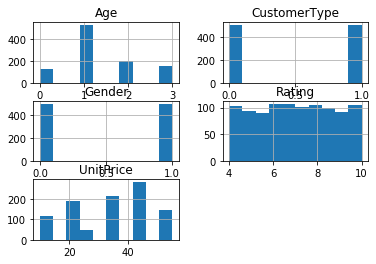

In [9]:
# histograms
df.hist()

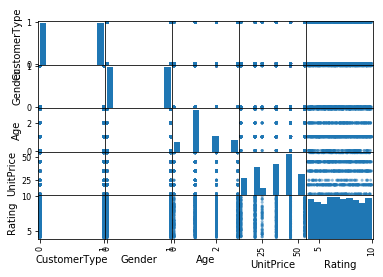

In [10]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

# Coorelation Matrix


In [11]:
df.corr()

,CustomerType,Gender,Age,UnitPrice,Rating
CustomerType,1.000000,0.040000,0.023659,0.036075,-0.017512
Gender,0.040000,1.000000,0.073229,0.007631,-0.003433
Age,0.023659,0.073229,1.000000,0.090477,0.004575
UnitPrice,0.036075,0.007631,0.090477,1.000000,-0.001371
Rating,-0.017512,-0.003433,0.004575,-0.001371,1.000000


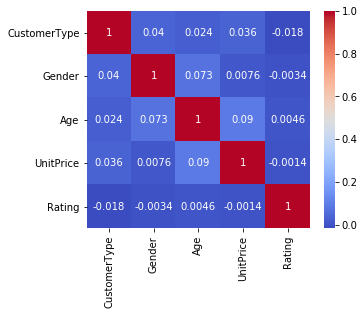

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['ItemName'] = le.fit_transform(df['ItemName'])
df.sample(10)
# df.head()

,CustomerType,Gender,Age,UnitPrice,Rating,ItemName
661,1,0,2,45,7.9,5
914,1,1,1,10,5.8,1
875,0,0,1,45,6.3,1
3,1,0,1,25,8.4,0
17,0,0,1,25,6.9,0
741,0,0,1,45,8.8,5
55,0,1,0,20,8.2,0
728,0,0,1,45,6.8,5
114,1,1,2,20,9.5,0
512,0,1,1,55,9.3,4


# Model Training

In [15]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['ItemName'])
Y = df['ItemName']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.390000 (0.049918)
LDA: 0.437143 (0.059659)
KNN: 0.655714 (0.039097)
CART: 0.667143 (0.035600)
NB: 0.707143 (0.030136)
SVM: 0.708571 (0.021381)


In [17]:
# model training
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
#     print(prepared_df)
    y_pred = model.predict(df)
    return y_pred
    

In [19]:
# df.sample(10)

In [20]:
config = {
    'CustomerType': [0],
    'Gender': [1],
    'Age': [2],
    'UnitPrice': [35],
    'Rating': [7.2]
    
}

predict_mpg(config, model)

array([2])

# Create Model File

In [21]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 69.33 %


In [22]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(config, model)

array([2])